# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_cifar



Using TensorFlow backend.


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0002'
DATA_NAME = 'horses'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #


## data

In [3]:
if DATA_NAME == 'cars':
    label = 1
elif DATA_NAME == 'horses':
    label = 7
(x_train, y_train) = load_cifar(label, 10)


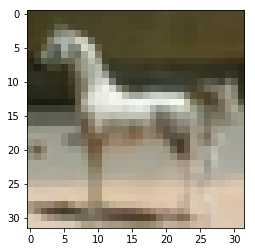

In [4]:
plt.imshow((x_train[150,:,:,:]+1)/2)

## architecture

In [5]:

if mode == 'build':

    gan = WGAN(input_dim = (32,32,3)
            , critic_conv_filters = [32,64,128,128]
            , critic_conv_kernel_size = [5,5,5,5]
            , critic_conv_strides = [2,2,2,1]
            , critic_batch_norm_momentum = None
            , critic_activation = 'leaky_relu'
            , critic_dropout_rate = None
            , critic_learning_rate = 0.00005
            , generator_initial_dense_layer_size = (4, 4, 128)
            , generator_upsample = [2,2, 2,1]
            , generator_conv_filters = [128,64,32,3]
            , generator_conv_kernel_size = [5,5,5,5]
            , generator_conv_strides = [1,1, 1,1]
            , generator_batch_norm_momentum = 0.8
            , generator_activation = 'leaky_relu'
            , generator_dropout_rate = None
            , generator_learning_rate = 0.00005
            , optimiser = 'rmsprop'
            , z_dim = 100
            )
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))








In [6]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 32)        2432      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

In [7]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              206848    
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 128)         0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 8, 8, 128)         409728    
__________

## training

In [8]:
BATCH_SIZE = 128
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
CLIP_THRESHOLD = 0.01

In [ ]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , clip_threshold = CLIP_THRESHOLD
)

C:\Users\Sage\Anaconda3\envs\cv_tf_gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (-0.000)(R -0.001, F 0.000)]  [G loss: -0.000] 
1 [D loss: (0.000)(R -0.001, F 0.001)]  [G loss: -0.000] 
2 [D loss: (0.000)(R -0.001, F 0.001)]  [G loss: -0.000] 
3 [D loss: (-0.000)(R -0.001, F 0.001)]  [G loss: -0.000] 
4 [D loss: (-0.000)(R -0.001, F 0.001)]  [G loss: -0.000] 
5 [D loss: (-0.000)(R -0.001, F 0.001)]  [G loss: -0.000] 
6 [D loss: (-0.000)(R -0.002, F 0.001)]  [G loss: -0.000] 
7 [D loss: (-0.000)(R -0.003, F 0.002)]  [G loss: -0.001] 
8 [D loss: (-0.000)(R -0.003, F 0.002)]  [G loss: -0.001] 
9 [D loss: (-0.002)(R -0.004, F 0.001)]  [G loss: -0.001] 
10 [D loss: (0.000)(R -0.003, F 0.003)]  [G loss: -0.001] 
11 [D loss: (-0.000)(R -0.003, F 0.003)]  [G loss: -0.002] 
12 [D loss: (-0.001)(R -0.003, F 0.002)]  [G loss: -0.001] 
13 [D loss: (-0.000)(R -0.003, F 0.002)]  [G loss: -0.001] 
14 [D loss: (-0.000)(R -0.003, F 0.002)]  [G loss: -0.001] 
15 [D loss: (-0.000)(R -0.003, F 0.002)]  [G loss: -0.001] 
16 [D loss: (-0.001)(R -0.003, F 0.001)]  [G loss: -0

138 [D loss: (-0.004)(R -0.008, F 0.000)]  [G loss: 0.006] 
139 [D loss: (-0.005)(R -0.008, F -0.001)]  [G loss: 0.004] 
140 [D loss: (-0.006)(R -0.010, F -0.002)]  [G loss: 0.007] 
141 [D loss: (-0.005)(R -0.010, F -0.001)]  [G loss: 0.004] 
142 [D loss: (-0.004)(R -0.008, F 0.001)]  [G loss: 0.006] 
143 [D loss: (-0.004)(R -0.006, F -0.001)]  [G loss: 0.007] 
144 [D loss: (-0.004)(R -0.008, F -0.000)]  [G loss: 0.008] 
145 [D loss: (-0.004)(R -0.006, F -0.003)]  [G loss: 0.008] 
146 [D loss: (-0.008)(R -0.009, F -0.006)]  [G loss: 0.009] 
147 [D loss: (-0.004)(R -0.007, F -0.000)]  [G loss: 0.007] 
148 [D loss: (-0.006)(R -0.009, F -0.002)]  [G loss: 0.008] 
149 [D loss: (-0.003)(R -0.005, F -0.001)]  [G loss: 0.007] 
150 [D loss: (-0.004)(R -0.007, F -0.002)]  [G loss: 0.008] 
151 [D loss: (-0.005)(R -0.008, F -0.002)]  [G loss: 0.008] 
152 [D loss: (-0.008)(R -0.011, F -0.005)]  [G loss: 0.002] 
153 [D loss: (-0.004)(R -0.009, F 0.000)]  [G loss: 0.006] 
154 [D loss: (-0.005)(R -0.

273 [D loss: (-0.004)(R -0.014, F 0.006)]  [G loss: 0.003] 
274 [D loss: (-0.006)(R -0.015, F 0.004)]  [G loss: 0.001] 
275 [D loss: (-0.003)(R -0.015, F 0.009)]  [G loss: 0.001] 
276 [D loss: (-0.003)(R -0.012, F 0.006)]  [G loss: 0.003] 
277 [D loss: (-0.005)(R -0.013, F 0.004)]  [G loss: 0.004] 
278 [D loss: (-0.006)(R -0.013, F 0.000)]  [G loss: 0.003] 
279 [D loss: (-0.006)(R -0.010, F -0.002)]  [G loss: 0.005] 
280 [D loss: (-0.003)(R -0.010, F 0.004)]  [G loss: 0.005] 
281 [D loss: (-0.002)(R -0.009, F 0.005)]  [G loss: 0.006] 
282 [D loss: (-0.005)(R -0.012, F 0.003)]  [G loss: 0.007] 
283 [D loss: (-0.006)(R -0.014, F 0.002)]  [G loss: 0.004] 
284 [D loss: (-0.006)(R -0.014, F 0.002)]  [G loss: 0.004] 
285 [D loss: (-0.004)(R -0.013, F 0.006)]  [G loss: 0.003] 
286 [D loss: (-0.004)(R -0.014, F 0.006)]  [G loss: 0.001] 
287 [D loss: (-0.002)(R -0.012, F 0.007)]  [G loss: 0.001] 
288 [D loss: (-0.004)(R -0.013, F 0.005)]  [G loss: 0.002] 
289 [D loss: (-0.005)(R -0.012, F 0.001

409 [D loss: (-0.007)(R -0.021, F 0.007)]  [G loss: 0.002] 
410 [D loss: (-0.006)(R -0.020, F 0.008)]  [G loss: 0.000] 
411 [D loss: (-0.007)(R -0.019, F 0.006)]  [G loss: 0.003] 
412 [D loss: (-0.006)(R -0.018, F 0.007)]  [G loss: -0.001] 
413 [D loss: (-0.006)(R -0.020, F 0.007)]  [G loss: -0.000] 
414 [D loss: (-0.004)(R -0.016, F 0.007)]  [G loss: 0.001] 
415 [D loss: (-0.004)(R -0.013, F 0.005)]  [G loss: 0.005] 
416 [D loss: (-0.008)(R -0.015, F -0.001)]  [G loss: 0.008] 
417 [D loss: (-0.007)(R -0.015, F 0.001)]  [G loss: 0.006] 
418 [D loss: (-0.006)(R -0.014, F 0.001)]  [G loss: 0.003] 
419 [D loss: (-0.004)(R -0.017, F 0.008)]  [G loss: -0.002] 
420 [D loss: (-0.005)(R -0.016, F 0.006)]  [G loss: 0.001] 
421 [D loss: (-0.007)(R -0.015, F 0.001)]  [G loss: 0.003] 
422 [D loss: (-0.010)(R -0.020, F 0.000)]  [G loss: 0.002] 
423 [D loss: (-0.010)(R -0.021, F 0.001)]  [G loss: -0.001] 
424 [D loss: (-0.007)(R -0.025, F 0.011)]  [G loss: -0.000] 
425 [D loss: (-0.008)(R -0.024, F 

545 [D loss: (-0.010)(R -0.037, F 0.017)]  [G loss: -0.004] 
546 [D loss: (-0.012)(R -0.040, F 0.017)]  [G loss: -0.009] 
547 [D loss: (-0.006)(R -0.036, F 0.023)]  [G loss: -0.007] 
548 [D loss: (-0.014)(R -0.039, F 0.010)]  [G loss: -0.005] 
549 [D loss: (-0.010)(R -0.038, F 0.018)]  [G loss: -0.008] 
550 [D loss: (-0.008)(R -0.039, F 0.022)]  [G loss: -0.013] 
551 [D loss: (-0.009)(R -0.035, F 0.017)]  [G loss: -0.013] 
552 [D loss: (-0.009)(R -0.042, F 0.025)]  [G loss: -0.013] 
553 [D loss: (-0.009)(R -0.037, F 0.019)]  [G loss: -0.014] 
554 [D loss: (-0.012)(R -0.034, F 0.011)]  [G loss: -0.009] 
555 [D loss: (-0.007)(R -0.032, F 0.019)]  [G loss: -0.000] 
556 [D loss: (-0.013)(R -0.036, F 0.011)]  [G loss: -0.000] 
557 [D loss: (-0.011)(R -0.030, F 0.008)]  [G loss: 0.002] 
558 [D loss: (-0.013)(R -0.035, F 0.010)]  [G loss: -0.001] 
559 [D loss: (-0.011)(R -0.036, F 0.013)]  [G loss: -0.004] 
560 [D loss: (-0.011)(R -0.035, F 0.013)]  [G loss: -0.000] 
561 [D loss: (-0.013)(R -

681 [D loss: (-0.009)(R -0.023, F 0.005)]  [G loss: 0.009] 
682 [D loss: (-0.009)(R -0.024, F 0.005)]  [G loss: 0.008] 
683 [D loss: (-0.011)(R -0.026, F 0.004)]  [G loss: 0.007] 
684 [D loss: (-0.011)(R -0.027, F 0.005)]  [G loss: 0.009] 
685 [D loss: (-0.010)(R -0.022, F 0.001)]  [G loss: 0.010] 
686 [D loss: (-0.011)(R -0.020, F -0.002)]  [G loss: 0.010] 
687 [D loss: (-0.007)(R -0.019, F 0.004)]  [G loss: 0.007] 
688 [D loss: (-0.009)(R -0.026, F 0.007)]  [G loss: 0.004] 
689 [D loss: (-0.011)(R -0.026, F 0.005)]  [G loss: 0.007] 
690 [D loss: (-0.009)(R -0.026, F 0.009)]  [G loss: 0.006] 
691 [D loss: (-0.011)(R -0.029, F 0.007)]  [G loss: 0.008] 
692 [D loss: (-0.010)(R -0.026, F 0.006)]  [G loss: 0.007] 
693 [D loss: (-0.013)(R -0.031, F 0.005)]  [G loss: 0.005] 
694 [D loss: (-0.011)(R -0.030, F 0.009)]  [G loss: 0.003] 
695 [D loss: (-0.015)(R -0.027, F -0.003)]  [G loss: -0.002] 
696 [D loss: (-0.013)(R -0.027, F 0.001)]  [G loss: 0.007] 
697 [D loss: (-0.017)(R -0.033, F -0.

817 [D loss: (-0.014)(R -0.028, F -0.001)]  [G loss: 0.006] 
818 [D loss: (-0.008)(R -0.027, F 0.010)]  [G loss: -0.003] 
819 [D loss: (-0.008)(R -0.027, F 0.011)]  [G loss: 0.002] 
820 [D loss: (-0.009)(R -0.028, F 0.009)]  [G loss: 0.000] 
821 [D loss: (-0.011)(R -0.029, F 0.008)]  [G loss: 0.005] 
822 [D loss: (-0.008)(R -0.028, F 0.011)]  [G loss: 0.008] 
823 [D loss: (-0.009)(R -0.028, F 0.011)]  [G loss: 0.004] 
824 [D loss: (-0.011)(R -0.029, F 0.008)]  [G loss: 0.004] 
825 [D loss: (-0.010)(R -0.027, F 0.008)]  [G loss: 0.005] 
826 [D loss: (-0.013)(R -0.031, F 0.004)]  [G loss: 0.005] 
827 [D loss: (-0.009)(R -0.022, F 0.004)]  [G loss: 0.006] 
828 [D loss: (-0.010)(R -0.025, F 0.005)]  [G loss: 0.007] 
829 [D loss: (-0.008)(R -0.022, F 0.006)]  [G loss: 0.004] 
830 [D loss: (-0.012)(R -0.029, F 0.004)]  [G loss: 0.012] 
831 [D loss: (-0.009)(R -0.025, F 0.007)]  [G loss: 0.007] 
832 [D loss: (-0.013)(R -0.028, F 0.002)]  [G loss: 0.005] 
833 [D loss: (-0.007)(R -0.027, F 0.01

953 [D loss: (-0.013)(R -0.034, F 0.007)]  [G loss: 0.015] 
954 [D loss: (-0.014)(R -0.028, F -0.001)]  [G loss: 0.011] 
955 [D loss: (-0.010)(R -0.031, F 0.011)]  [G loss: -0.001] 
956 [D loss: (-0.006)(R -0.032, F 0.020)]  [G loss: -0.002] 
957 [D loss: (-0.009)(R -0.039, F 0.020)]  [G loss: 0.002] 
958 [D loss: (-0.012)(R -0.042, F 0.018)]  [G loss: 0.003] 
959 [D loss: (-0.016)(R -0.048, F 0.016)]  [G loss: -0.002] 
960 [D loss: (-0.017)(R -0.045, F 0.011)]  [G loss: -0.005] 
961 [D loss: (-0.021)(R -0.053, F 0.011)]  [G loss: -0.004] 
962 [D loss: (-0.006)(R -0.036, F 0.024)]  [G loss: -0.010] 
963 [D loss: (-0.007)(R -0.033, F 0.020)]  [G loss: -0.000] 
964 [D loss: (-0.014)(R -0.035, F 0.007)]  [G loss: 0.013] 
965 [D loss: (-0.014)(R -0.021, F -0.007)]  [G loss: 0.012] 
966 [D loss: (-0.014)(R -0.028, F 0.000)]  [G loss: 0.008] 
967 [D loss: (-0.006)(R -0.022, F 0.009)]  [G loss: 0.008] 
968 [D loss: (-0.012)(R -0.030, F 0.005)]  [G loss: 0.003] 
969 [D loss: (-0.010)(R -0.025,

1087 [D loss: (-0.008)(R -0.025, F 0.010)]  [G loss: 0.011] 
1088 [D loss: (-0.015)(R -0.030, F 0.001)]  [G loss: 0.014] 
1089 [D loss: (-0.008)(R -0.029, F 0.012)]  [G loss: 0.007] 
1090 [D loss: (-0.008)(R -0.030, F 0.014)]  [G loss: 0.003] 
1091 [D loss: (-0.015)(R -0.043, F 0.013)]  [G loss: -0.004] 
1092 [D loss: (-0.013)(R -0.037, F 0.010)]  [G loss: 0.001] 
1093 [D loss: (-0.018)(R -0.042, F 0.006)]  [G loss: 0.007] 
1094 [D loss: (-0.007)(R -0.028, F 0.013)]  [G loss: 0.005] 
1095 [D loss: (-0.012)(R -0.029, F 0.005)]  [G loss: 0.005] 
1096 [D loss: (-0.010)(R -0.032, F 0.012)]  [G loss: 0.004] 
1097 [D loss: (-0.010)(R -0.032, F 0.012)]  [G loss: 0.003] 
1098 [D loss: (-0.012)(R -0.035, F 0.011)]  [G loss: 0.002] 
1099 [D loss: (-0.015)(R -0.026, F -0.003)]  [G loss: 0.016] 
1100 [D loss: (-0.015)(R -0.031, F 0.001)]  [G loss: 0.011] 
1101 [D loss: (-0.009)(R -0.025, F 0.007)]  [G loss: 0.011] 
1102 [D loss: (-0.014)(R -0.030, F 0.003)]  [G loss: 0.008] 
1103 [D loss: (-0.010)

1221 [D loss: (-0.015)(R -0.030, F 0.001)]  [G loss: 0.011] 
1222 [D loss: (-0.013)(R -0.034, F 0.008)]  [G loss: 0.009] 
1223 [D loss: (-0.013)(R -0.031, F 0.004)]  [G loss: 0.003] 
1224 [D loss: (-0.011)(R -0.028, F 0.006)]  [G loss: -0.000] 
1225 [D loss: (-0.009)(R -0.031, F 0.012)]  [G loss: 0.002] 
1226 [D loss: (-0.015)(R -0.030, F 0.000)]  [G loss: 0.004] 
1227 [D loss: (-0.012)(R -0.038, F 0.015)]  [G loss: 0.005] 
1228 [D loss: (-0.011)(R -0.030, F 0.009)]  [G loss: 0.006] 
1229 [D loss: (-0.014)(R -0.038, F 0.010)]  [G loss: -0.002] 
1230 [D loss: (-0.007)(R -0.031, F 0.017)]  [G loss: 0.004] 
1231 [D loss: (-0.006)(R -0.027, F 0.015)]  [G loss: 0.006] 
1232 [D loss: (-0.013)(R -0.036, F 0.010)]  [G loss: -0.002] 
1233 [D loss: (-0.011)(R -0.042, F 0.020)]  [G loss: 0.002] 
1234 [D loss: (-0.015)(R -0.047, F 0.018)]  [G loss: -0.004] 
1235 [D loss: (-0.021)(R -0.053, F 0.010)]  [G loss: -0.001] 
1236 [D loss: (-0.015)(R -0.046, F 0.015)]  [G loss: -0.001] 
1237 [D loss: (-0.

1355 [D loss: (-0.012)(R -0.043, F 0.019)]  [G loss: -0.006] 
1356 [D loss: (-0.024)(R -0.057, F 0.009)]  [G loss: -0.001] 
1357 [D loss: (-0.013)(R -0.052, F 0.025)]  [G loss: -0.004] 
1358 [D loss: (-0.014)(R -0.046, F 0.018)]  [G loss: -0.003] 
1359 [D loss: (-0.012)(R -0.043, F 0.018)]  [G loss: 0.002] 
1360 [D loss: (-0.012)(R -0.039, F 0.016)]  [G loss: 0.005] 
1361 [D loss: (-0.010)(R -0.038, F 0.018)]  [G loss: 0.000] 
1362 [D loss: (-0.007)(R -0.038, F 0.024)]  [G loss: -0.003] 
1363 [D loss: (-0.017)(R -0.044, F 0.010)]  [G loss: -0.000] 
1364 [D loss: (-0.017)(R -0.039, F 0.006)]  [G loss: 0.005] 
1365 [D loss: (-0.017)(R -0.042, F 0.008)]  [G loss: 0.005] 
1366 [D loss: (-0.009)(R -0.029, F 0.012)]  [G loss: 0.008] 
1367 [D loss: (-0.013)(R -0.034, F 0.007)]  [G loss: 0.013] 
1368 [D loss: (-0.014)(R -0.035, F 0.007)]  [G loss: 0.014] 
1369 [D loss: (-0.014)(R -0.032, F 0.004)]  [G loss: 0.017] 
1370 [D loss: (-0.015)(R -0.027, F -0.002)]  [G loss: 0.019] 
1371 [D loss: (-0

1489 [D loss: (-0.014)(R -0.041, F 0.013)]  [G loss: 0.006] 
1490 [D loss: (-0.017)(R -0.049, F 0.016)]  [G loss: 0.001] 
1491 [D loss: (-0.010)(R -0.039, F 0.020)]  [G loss: -0.001] 
1492 [D loss: (-0.010)(R -0.037, F 0.017)]  [G loss: -0.000] 
1493 [D loss: (-0.018)(R -0.045, F 0.009)]  [G loss: -0.004] 
1494 [D loss: (-0.020)(R -0.041, F 0.001)]  [G loss: 0.008] 
1495 [D loss: (-0.010)(R -0.018, F -0.001)]  [G loss: 0.014] 
1496 [D loss: (-0.014)(R -0.023, F -0.005)]  [G loss: 0.023] 
1497 [D loss: (-0.020)(R -0.033, F -0.008)]  [G loss: 0.017] 
1498 [D loss: (-0.010)(R -0.031, F 0.010)]  [G loss: 0.015] 
1499 [D loss: (-0.009)(R -0.030, F 0.013)]  [G loss: 0.006] 
1500 [D loss: (-0.008)(R -0.032, F 0.016)]  [G loss: -0.005] 
1501 [D loss: (-0.014)(R -0.040, F 0.012)]  [G loss: 0.008] 
1502 [D loss: (-0.016)(R -0.042, F 0.010)]  [G loss: 0.001] 
1503 [D loss: (-0.007)(R -0.038, F 0.023)]  [G loss: 0.003] 
1504 [D loss: (-0.014)(R -0.046, F 0.019)]  [G loss: 0.007] 
1505 [D loss: (-0

1622 [D loss: (-0.013)(R -0.015, F -0.010)]  [G loss: 0.022] 
1623 [D loss: (-0.015)(R -0.031, F 0.000)]  [G loss: 0.013] 
1624 [D loss: (-0.009)(R -0.025, F 0.007)]  [G loss: 0.011] 
1625 [D loss: (-0.016)(R -0.047, F 0.015)]  [G loss: -0.001] 
1626 [D loss: (-0.015)(R -0.051, F 0.020)]  [G loss: -0.010] 
1627 [D loss: (-0.014)(R -0.053, F 0.024)]  [G loss: -0.009] 
1628 [D loss: (-0.018)(R -0.072, F 0.035)]  [G loss: -0.011] 
1629 [D loss: (-0.021)(R -0.064, F 0.022)]  [G loss: -0.022] 
1630 [D loss: (-0.028)(R -0.075, F 0.020)]  [G loss: -0.035] 
1631 [D loss: (-0.009)(R -0.060, F 0.042)]  [G loss: -0.030] 
1632 [D loss: (-0.010)(R -0.053, F 0.032)]  [G loss: -0.010] 
1633 [D loss: (-0.017)(R -0.049, F 0.015)]  [G loss: 0.009] 
1634 [D loss: (-0.018)(R -0.047, F 0.011)]  [G loss: 0.012] 
1635 [D loss: (-0.004)(R -0.033, F 0.025)]  [G loss: 0.012] 
1636 [D loss: (-0.010)(R -0.036, F 0.016)]  [G loss: -0.002] 
1637 [D loss: (-0.016)(R -0.048, F 0.016)]  [G loss: -0.004] 
1638 [D loss:

1756 [D loss: (-0.011)(R -0.041, F 0.018)]  [G loss: 0.005] 
1757 [D loss: (-0.011)(R -0.039, F 0.017)]  [G loss: 0.007] 
1758 [D loss: (-0.012)(R -0.040, F 0.015)]  [G loss: 0.002] 
1759 [D loss: (-0.007)(R -0.034, F 0.019)]  [G loss: -0.005] 
1760 [D loss: (-0.010)(R -0.043, F 0.023)]  [G loss: -0.009] 
1761 [D loss: (-0.014)(R -0.041, F 0.012)]  [G loss: -0.000] 
1762 [D loss: (-0.007)(R -0.039, F 0.025)]  [G loss: -0.000] 
1763 [D loss: (-0.017)(R -0.044, F 0.010)]  [G loss: 0.010] 
1764 [D loss: (-0.015)(R -0.036, F 0.006)]  [G loss: 0.014] 
1765 [D loss: (-0.010)(R -0.034, F 0.013)]  [G loss: 0.008] 
1766 [D loss: (-0.011)(R -0.040, F 0.017)]  [G loss: -0.001] 
1767 [D loss: (-0.010)(R -0.039, F 0.019)]  [G loss: 0.002] 
1768 [D loss: (-0.015)(R -0.047, F 0.018)]  [G loss: 0.001] 
1769 [D loss: (-0.014)(R -0.046, F 0.018)]  [G loss: 0.001] 
1770 [D loss: (-0.020)(R -0.054, F 0.013)]  [G loss: -0.004] 
1771 [D loss: (-0.016)(R -0.050, F 0.017)]  [G loss: 0.002] 
1772 [D loss: (-0.

1890 [D loss: (-0.019)(R -0.060, F 0.023)]  [G loss: -0.003] 
1891 [D loss: (-0.014)(R -0.051, F 0.022)]  [G loss: 0.000] 
1892 [D loss: (-0.016)(R -0.052, F 0.021)]  [G loss: -0.003] 
1893 [D loss: (-0.016)(R -0.049, F 0.017)]  [G loss: -0.007] 
1894 [D loss: (-0.019)(R -0.055, F 0.016)]  [G loss: -0.015] 
1895 [D loss: (-0.016)(R -0.044, F 0.013)]  [G loss: -0.009] 
1896 [D loss: (-0.017)(R -0.041, F 0.006)]  [G loss: -0.004] 
1897 [D loss: (-0.015)(R -0.042, F 0.013)]  [G loss: 0.012] 
1898 [D loss: (-0.029)(R -0.036, F -0.022)]  [G loss: 0.013] 
1899 [D loss: (-0.023)(R -0.041, F -0.006)]  [G loss: 0.010] 
1900 [D loss: (-0.014)(R -0.052, F 0.024)]  [G loss: 0.001] 
1901 [D loss: (-0.008)(R -0.060, F 0.043)]  [G loss: -0.012] 
1902 [D loss: (-0.021)(R -0.080, F 0.039)]  [G loss: -0.020] 
1903 [D loss: (-0.021)(R -0.067, F 0.025)]  [G loss: -0.028] 
1904 [D loss: (-0.023)(R -0.061, F 0.015)]  [G loss: -0.020] 
1905 [D loss: (-0.006)(R -0.045, F 0.034)]  [G loss: -0.016] 
1906 [D los

2023 [D loss: (-0.016)(R -0.036, F 0.004)]  [G loss: 0.003] 
2024 [D loss: (-0.011)(R -0.039, F 0.017)]  [G loss: 0.004] 
2025 [D loss: (-0.013)(R -0.033, F 0.006)]  [G loss: 0.007] 
2026 [D loss: (-0.013)(R -0.031, F 0.005)]  [G loss: 0.005] 
2027 [D loss: (-0.010)(R -0.036, F 0.016)]  [G loss: -0.001] 
2028 [D loss: (-0.008)(R -0.040, F 0.023)]  [G loss: 0.000] 
2029 [D loss: (-0.025)(R -0.048, F -0.003)]  [G loss: 0.006] 
2030 [D loss: (-0.019)(R -0.039, F 0.002)]  [G loss: -0.003] 
2031 [D loss: (-0.019)(R -0.038, F 0.000)]  [G loss: 0.001] 
2032 [D loss: (-0.018)(R -0.050, F 0.014)]  [G loss: -0.007] 
2033 [D loss: (-0.021)(R -0.044, F 0.002)]  [G loss: -0.005] 
2034 [D loss: (-0.020)(R -0.049, F 0.008)]  [G loss: -0.012] 
2035 [D loss: (-0.021)(R -0.065, F 0.023)]  [G loss: -0.025] 
2036 [D loss: (-0.002)(R -0.058, F 0.054)]  [G loss: -0.025] 
2037 [D loss: (-0.008)(R -0.064, F 0.048)]  [G loss: -0.023] 
2038 [D loss: (-0.016)(R -0.065, F 0.032)]  [G loss: -0.026] 
2039 [D loss: 

2156 [D loss: (-0.017)(R -0.044, F 0.010)]  [G loss: 0.002] 
2157 [D loss: (-0.006)(R -0.032, F 0.021)]  [G loss: -0.005] 
2158 [D loss: (-0.009)(R -0.036, F 0.017)]  [G loss: -0.010] 
2159 [D loss: (-0.009)(R -0.039, F 0.021)]  [G loss: -0.016] 
2160 [D loss: (-0.016)(R -0.048, F 0.016)]  [G loss: -0.008] 
2161 [D loss: (-0.020)(R -0.056, F 0.015)]  [G loss: -0.003] 
2162 [D loss: (-0.018)(R -0.052, F 0.016)]  [G loss: 0.006] 
2163 [D loss: (-0.022)(R -0.055, F 0.012)]  [G loss: -0.006] 
2164 [D loss: (-0.010)(R -0.048, F 0.029)]  [G loss: -0.010] 
2165 [D loss: (-0.013)(R -0.055, F 0.030)]  [G loss: -0.014] 
2166 [D loss: (-0.018)(R -0.060, F 0.023)]  [G loss: -0.032] 
2167 [D loss: (-0.001)(R -0.040, F 0.038)]  [G loss: -0.029] 
2168 [D loss: (-0.014)(R -0.052, F 0.024)]  [G loss: -0.014] 
2169 [D loss: (-0.013)(R -0.051, F 0.026)]  [G loss: 0.006] 
2170 [D loss: (-0.022)(R -0.035, F -0.009)]  [G loss: 0.018] 
2171 [D loss: (-0.017)(R -0.040, F 0.007)]  [G loss: 0.010] 
2172 [D loss

In [ ]:
gan.sample_images(RUN_FOLDER)

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

# plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()

In [ ]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

In [ ]:

r, c = 5, 5

idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
true_imgs = (x_train[idx] + 1) *0.5

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(true_imgs[cnt], cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/real.png"))
plt.close()

In [ ]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

#Rescale images 0 - 1

gen_imgs = 0.5 * (gen_imgs + 1)
# gen_imgs = np.clip(gen_imgs, 0, 1)

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/sample.png"))
plt.close()


fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        c_diff = 99999
        c_img = None
        for k_idx, k in enumerate((x_train + 1) * 0.5):
            
            diff = compare_images(gen_imgs[cnt, :,:,:], k)
            if diff < c_diff:
                c_img = np.copy(k)
                c_diff = diff
        axs[i,j].imshow(c_img, cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1

fig.savefig(os.path.join(RUN_FOLDER, "images/sample_closest.png"))
plt.close()